In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import os
import sys
import time
import json

In [2]:
# read the file
df = pd.read_csv('PMA_blockbuster_movies.csv')
df.head()

,poster_url,rt_audience_score,rt_freshness,2015_inflation,adjusted,genres,Genre_1,Genre_2,Genre_3,imdb_rating,length,rating,release_date,studio,title,worldwide_gross,year
0,http://resizing.flixster.com/gxRJwetP1eNIrPR6x...,4.3,89.0,-0.26%,"$712,903,691.09",Sci-Fi\nAdventure\nAction,Sci-Fi,Adventure,Action,7.8,136.0,PG-13,04-Apr-14,Marvel Studios,Captain America: The Winter Soldier,"$714,766,572.00",2014.0
1,http://resizing.flixster.com/gDtbA1iPxTYEjBZeS...,4.2,90.0,-0.26%,"$706,988,165.89",Sci-Fi\nDrama\nAction,Sci-Fi,Drama,Action,7.7,130.0,PG-13,11-Jul-14,20th Century Fox,Dawn of the Planet of the Apes,"$708,835,589.00",2014.0
2,http://resizing.flixster.com/YrF_OeTQx3bXNsMLI...,4.4,91.0,-0.26%,"$772,158,880.00",Sci-Fi\nAdventure\nAction,Sci-Fi,Adventure,Action,8.1,121.0,PG-13,01-Aug-14,Marvel Studios,Guardians of the Galaxy,"$774,176,600.00",2014.0
3,http://resizing.flixster.com/l9yjA-72sZMYECeOj...,4.2,72.0,-0.26%,"$671,220,455.10",Sci-Fi\nAdventure,Sci-Fi,Adventure,NaN,8.7,169.0,PG-13,07-Nov-14,Paramount Pictures / Warner Bros.,Interstellar,"$672,974,414.00",2014.0
4,http://resizing.flixster.com/YukULOFULUesVZccN...,3.8,49.0,-0.26%,"$756,677,675.77",Family\nAdventure\nAction,Family,Adventure,Action,7.1,97.0,PG,30-May-14,Walt Disney Pictures,Maleficent,"$758,654,942.00",2014.0


In [3]:
# droping the features which seems no influence on prediction
""" 'poster_url' is not influensing to prediction, unless people are not captured by adds and word of mouth
    
    'genres','Genre_1','Genre_2','Genre_3' are worthwhile features for prediction, however, I dont know how to transform 
     them into the numbers. through 'dummies' it is going to be many features and since the same genre occur in 
     'Genre_1','Genre_2','Genre_3' it seem to be repeatitive. 
     
     'release_date','year' - is also not useful for prediction, since doesn't make sence.
     
     'title' - at some point make sense, but not much.
     
     'worldwide_gross'- since it is one of the target variable and it is similar to 'Adjusted' column it shouldnt be
      in the set of X variables.
"""

df = df.drop(columns=['studio','poster_url','genres','Genre_1','Genre_2',
                      'Genre_3','release_date','title','worldwide_gross','year'])

In [4]:
# to split the values of Rating by types

df = pd.get_dummies(df, columns=["rating"], prefix=["rating_type"])

In [5]:
df.head()

,rt_audience_score,rt_freshness,2015_inflation,adjusted,imdb_rating,length,rating_type_G,rating_type_PG,rating_type_PG-13,rating_type_R
0,4.3,89.0,-0.26%,"$712,903,691.09",7.8,136.0,0,0,1,0
1,4.2,90.0,-0.26%,"$706,988,165.89",7.7,130.0,0,0,1,0
2,4.4,91.0,-0.26%,"$772,158,880.00",8.1,121.0,0,0,1,0
3,4.2,72.0,-0.26%,"$671,220,455.10",8.7,169.0,0,0,1,0
4,3.8,49.0,-0.26%,"$756,677,675.77",7.1,97.0,0,1,0,0


In [6]:
# drop the % character from cloumn '2015_inflation'
# drop the $ character from column 'adjusted'

df['2015_inflation'] = df['2015_inflation'].str[:-1].astype(float)
df['adjusted'] = df['adjusted'].str[1:].astype(str)


In [7]:
df.head()

,rt_audience_score,rt_freshness,2015_inflation,adjusted,imdb_rating,length,rating_type_G,rating_type_PG,rating_type_PG-13,rating_type_R
0,4.3,89.0,-0.26,"712,903,691.09",7.8,136.0,0,0,1,0
1,4.2,90.0,-0.26,"706,988,165.89",7.7,130.0,0,0,1,0
2,4.4,91.0,-0.26,"772,158,880.00",8.1,121.0,0,0,1,0
3,4.2,72.0,-0.26,"671,220,455.10",8.7,169.0,0,0,1,0
4,3.8,49.0,-0.26,"756,677,675.77",7.1,97.0,0,1,0,0


In [8]:
# drop ',' from column 'adjusted' and change the type of column to Float
df['adjusted'] = df['adjusted'].str.replace('\,','')
df['adjusted'] = df['adjusted'].astype(float)

In [9]:
df.head()

,rt_audience_score,rt_freshness,2015_inflation,adjusted,imdb_rating,length,rating_type_G,rating_type_PG,rating_type_PG-13,rating_type_R
0,4.3,89.0,-0.26,7.129037e+08,7.8,136.0,0,0,1,0
1,4.2,90.0,-0.26,7.069882e+08,7.7,130.0,0,0,1,0
2,4.4,91.0,-0.26,7.721589e+08,8.1,121.0,0,0,1,0
3,4.2,72.0,-0.26,6.712205e+08,8.7,169.0,0,0,1,0
4,3.8,49.0,-0.26,7.566777e+08,7.1,97.0,0,1,0,0


In [10]:
#for classification model the column values are replaced by 1 if it is more than mean of column, otherwise to 0
df['adjusted'] = np.where(df['adjusted'] > df["adjusted"].mean(), 1, 0)

In [11]:
df

,rt_audience_score,rt_freshness,2015_inflation,adjusted,imdb_rating,length,rating_type_G,rating_type_PG,rating_type_PG-13,rating_type_R
0,4.3,89.0,-0.26,1,7.8,136.0,0,0,1,0
1,4.2,90.0,-0.26,1,7.7,130.0,0,0,1,0
2,4.4,91.0,-0.26,1,8.1,121.0,0,0,1,0
3,4.2,72.0,-0.26,1,8.7,169.0,0,0,1,0
4,3.8,49.0,-0.26,1,7.1,97.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
394,3.2,56.0,338.88,0,6.2,100.0,1,0,0,0
395,3.6,0.0,338.88,0,6.4,103.0,0,1,0,0
396,3.4,89.0,338.88,0,7.1,113.0,1,0,0,0
397,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0


In [12]:
df = df.dropna()

In [13]:
# splitting data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:, df.columns != 'adjusted'], df['adjusted'], 
		test_size = 0.2, random_state=5)  # X is “1:” and Y is “[0]”

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(318, 9)
(80, 9)
(318,)
(80,)


In [14]:
from sklearn.tree import DecisionTreeClassifier as DTC

# a decision tree model with default values
dtc = DTC()

# fit the model using some training data
dtc_fit = dtc.fit(X_train, Y_train)

# generate a mean accuracy score for the predicted data
train_score = dtc.score(X_train, Y_train)

# print the mean accuracy of testing predictions
print("Accuracy score = " + str(round(train_score, 4)))


#################################################################
#####                                                       #####
#####  TESTING PART - ONLY RUN WHEN THE MODEL IS TUNED!!    #####
#####                                                       #####
#################################################################

# predict the test data
predicted = dtc.predict(X_test)

# generate a mean accuracy score for the predicted data
test_score = dtc.score(X_test, Y_test)

# print the mean accuracy of testing predictions
print("Accuracy score = " + str(round(test_score, 4)))

Accuracy score = 1.0
Accuracy score = 0.7875


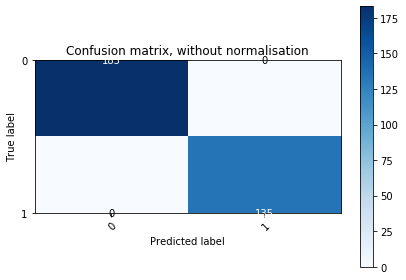

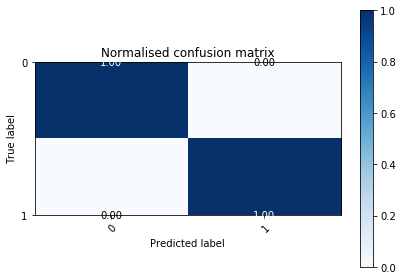

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalise=True`.
    """
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

# predict the test data - change model for whatever name you are using for the model
predicted = dtc.predict(X_train)

# Plot non-normalised confusion matrix
plot_confusion_matrix(Y_train, predicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(Y_train, predicted, classes=["0", "1"], normalise=True)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier as DTC

tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]

scores = ['accuracy', 'f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(DTC(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for accuracy




/Users/kassiyettopysheva/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_split': 7}


# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5}




/Users/kassiyettopysheva/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
from sklearn.tree import DecisionTreeClassifier as DTC

# a decision tree model with default values
dtc = DTC(criterion= 'gini', max_depth= 7, max_features= 'log2', min_samples_split = 7)

# fit the model using some training data, learn the rules 
dtc_fit = dtc.fit(X_train, Y_train)

# generate a mean accuracy score for the predicted data
train_score = dtc.score(X_train, Y_train)

# print the mean accuracy of testing predictions
print("Accuracy score = " + str(round(train_score, 4)))

Accuracy score = 0.8805


In [27]:

# predict the test data
predicted = dtc.predict(X_test)

# generate a mean accuracy score for the predicted data
test_score = dtc.score(X_test, Y_test)

# print the mean accuracy of testing predictions
print("Accuracy score = " + str(round(test_score, 4)))

Accuracy score = 0.85


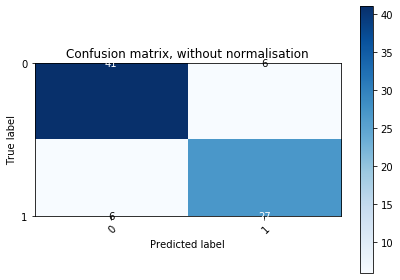

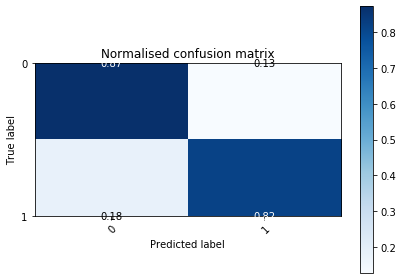

In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalise=True`.
    """
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

# predict the test data - change model for whatever name you are using for the model
predicted = dtc.predict(X_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"], normalise=True)